<a href="https://colab.research.google.com/github/wahyunh10/Project-Online-Retail-Dataset/blob/main/Online_Retail_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETAIL ONLINE DATASET (EDA + RFM Analysis)**

---



# **Introduction**

Let's Explore Retail Online Dataset and Summarize it using the final dashboard. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [8]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# **Import Data**

---


Import the excel file as panda Data Frames and examine it.

In [9]:
#Import the excel file and examine it
df = pd.read_excel('Online Retail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.shape

(541909, 8)

# **Cleansing Dataset**

In [11]:
#Investigate missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
#drop missing value
df = df.dropna()
df.shape

(406829, 8)

In [13]:
#Check the data type
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
#Cleaning String and data type
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace(r"\s+",' ', regex = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['CustomerID'] = df['CustomerID'].astype('string')
df.dtypes

InvoiceNo              string
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             string
Country                object
dtype: object

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


This is strange if our dataset contains high negative values. If we look carefully, not all of our dataset contain transactions from selling products activities. Some of fees and costs are included in this dataset. This fees and cost are in StockCode that contain only letter or alphabet (including space) values.

In [18]:
#Cleaning Data Frame where StockCode contains space
df['string'] = df.StockCode.str.isalpha()
df = df[df['string'] != False]
df['space'] = df.StockCode.str.contains(' ')
df = df[df['space'] != False]
df = df.drop(columns=['string', 'space'])
df.shape

(371020, 8)

Next we have to filtering out canceled transaction. In the description of dataset, it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'C'.

In [19]:
#Filtering transaction with invoice number started with letter 'C'
df = df[~df.InvoiceNo.str.contains('C')]
df.shape

(363119, 8)

Next, it is time to remove duplicate data.

In [20]:
#Remove ruplicate data in EXACT columns
df.drop_duplicates(inplace = True)
df.shape

(358309, 8)

We move to the next step. In this step, we need to deal with Outlier data. Outlier is a data point in the dataset that differs significantly from the other data or observations. Many statistic procedures are affected by the presence of outliers. So, in this case, removing the outlier may be an option.

In this method, we use IQR (Inter Quartile Range). IQR approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [21]:
#Finding the IQR of UnitPrice
percentile25 = df['UnitPrice'].quantile(0.25)
percentile75 = df['UnitPrice'].quantile(0.75)
iqr = percentile75 - percentile25
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Removing Outlier from UnitPrice
new_df = df[(df['UnitPrice'] < upper_limit)  & (df['UnitPrice'] > lower_limit)]
print(df.shape)
print(new_df.shape)

(358309, 8)
(326249, 8)


In [22]:
#Finding the IQR of UnitPrice
percentile25 = new_df['Quantity'].quantile(0.25)
percentile75 = new_df['Quantity'].quantile(0.75)
iqr = percentile75 - percentile25
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#Removing Outlier from UnitPrice
new_df = new_df[(new_df['Quantity'] < upper_limit)  & (new_df['Quantity'] > lower_limit)]
print(new_df.shape)

(303169, 8)


Next it is time to extract the to to make our analysis easier.

In [23]:
#Extract date from datetime column in Pandas
new_df['Date'] = new_df['InvoiceDate'].dt.normalize()
new_df['Year'] = new_df['InvoiceDate'].dt.year
new_df['Month'] = new_df['InvoiceDate'].dt.month_name().str[:3]
new_df['Day'] = new_df['InvoiceDate'].dt.day_name()
new_df['hour'] = new_df['InvoiceDate'].dt.hour
new_df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

Finally, for the last step, it's time to create columns Sales to know the total value for each transaction.

In [24]:
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,hour,month_year,Sales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,12.60


# **Exploratory Analysis**

Exploratory data analysis is a way to better understand our data which helps in further Data preprocessing. And data visualization is a key, making the exploratory data analysis process streamline and easily analyzing data using plots and charts.

# **Sales vs Quantity**
**Sales and Quantity Based on Country**

In [25]:
Sales_Country = new_df.groupby(['Country']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)
print(Sales_Country.head(10))

                Total_Order       Sales  Quantity
Country                                          
United Kingdom       272708  3352647.62   1970315
Germany                6934   126673.74     78420
France                 6535   115502.90     72293
EIRE                   4920    95928.40     53805
Spain                  1849    27338.06     16945
Switzerland            1313    26943.79     16635
Belgium                1527    25941.26     16325
Portugal               1176    18982.35     11214
Norway                  717    16711.56      8772
Netherlands             576    13980.84      6703


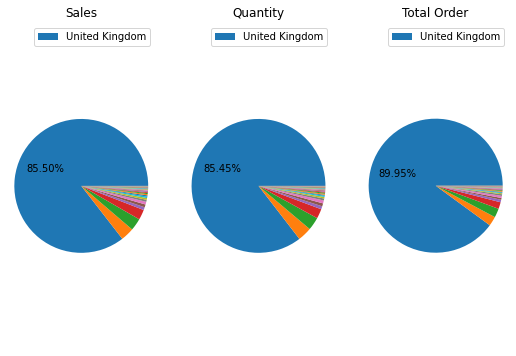

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 80 else ''

p,t,a = ax1.pie(Sales_Country.Sales, autopct=autopct)
p,t,a = ax2.pie(Sales_Country.Quantity, autopct=autopct)
p,t,a = ax3.pie(Sales_Country.Total_Order, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Sales_Country.Sales/Sales_Country.Sales.sum()*100
normsizes2 = Sales_Country.Quantity/Sales_Country.Quantity.sum()*100
normsizes3 = Sales_Country.Total_Order/Sales_Country.Total_Order.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes.values) if i > 80])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes2.values) if i > 80])
h,k = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes3.values) if i > 80])
ax1.set_title('Sales')
ax2.set_title('Quantity')
ax3.set_title('Total Order')
ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(h, k,loc="best", bbox_to_anchor=(1,1))
plt.show()

From the previous chart, we know. Most of transactions with the percentage 0f 80% more (Total Order, Sales, and Quantity) are coming from the United Kingdom (UK) or domestic transaction. Now let's explore, where is the best foreign transaction for online retail.

In [27]:
Foreign_Sales = Sales_Country.reset_index().query('Country != "United Kingdom"')
Foreign_Sales.head(10)

,Country,Total_Order,Sales,Quantity
1,Germany,6934,126673.74,78420
2,France,6535,115502.90,72293
3,EIRE,4920,95928.40,53805
4,Spain,1849,27338.06,16945
5,Switzerland,1313,26943.79,16635
6,Belgium,1527,25941.26,16325
7,Portugal,1176,18982.35,11214
8,Norway,717,16711.56,8772
9,Netherlands,576,13980.84,6703
10,Australia,467,11709.71,4876


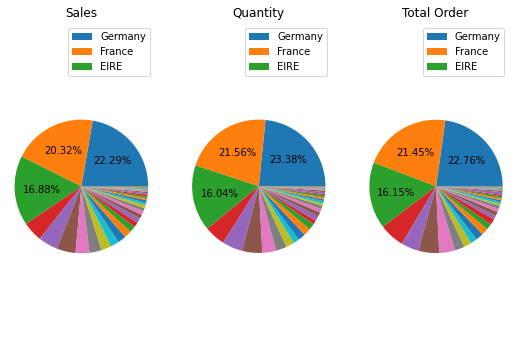

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 15 else ''

p,t,a = ax1.pie(Foreign_Sales.Sales, autopct=autopct)
p,t,a = ax2.pie(Foreign_Sales.Quantity, autopct=autopct)
p,t,a = ax3.pie(Foreign_Sales.Total_Order, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Foreign_Sales.Sales/Foreign_Sales.Sales.sum()*100
normsizes2 = Foreign_Sales.Quantity/Foreign_Sales.Quantity.sum()*100
normsizes3 = Foreign_Sales.Total_Order/Foreign_Sales.Total_Order.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes.values) if i > 15])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes2.values) if i > 15])
h,k = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes3.values) if i > 15])
ax1.set_title('Sales')
ax2.set_title('Quantity')
ax3.set_title('Total Order')
ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(h, k,loc="best", bbox_to_anchor=(1,1))
plt.show()

Finally we can see, the Top 3 of foreign transactions. They are, Germany, France and Ireland.

# **Sales MoM**
Next, let's explore the growth of sales and quantity of product month to month (MOM)

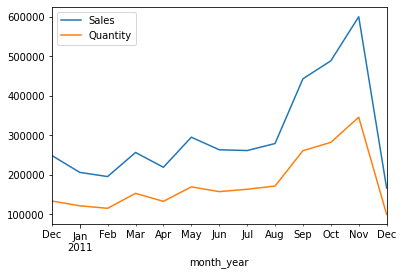

In [29]:
Sales_MoM = pd.DataFrame(new_df.groupby(['month_year']).agg({'Sales':'sum', 'Quantity':'sum'})).reset_index()
Sales_MoM.plot(x='month_year');

From the previous chart, we can conclude, the growth seems to have occurred since August and reached its highest point in November 2011.

# **Top Sales by Product**

In [30]:
Sales_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)[0:10]
Quantity_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Quantity', ascending=False)[0:10]
print(Sales_Product)
print(Quantity_Product)

                                  Total_Order     Sales
Description                                            
PARTY BUNTING                            1268  34952.85
SPOTTY BUNTING                            972  23379.40
ASSORTED COLOUR BIRD ORNAMENT            1144  22848.80
JAM MAKING SET WITH JARS                  824  21137.25
HOT WATER BOTTLE KEEP CALM                723  20617.35
SET OF 3 CAKE TINS PANTRY DESIGN         1113  20583.97
CHILLI LIGHTS                             443  18379.80
CHOCOLATE HOT WATER BOTTLE                684  18308.10
RETROSPOT TEA SET CERAMIC 11 PC           806  17941.60
NATURAL SLATE HEART CHALKBOARD            936  17750.77
                                    Total_Order  Quantity
Description                                              
PACK OF 72 RETROSPOT CAKE CASES             945     14986
ASSORTED COLOUR BIRD ORNAMENT              1144     13520
LUNCH BAG RED RETROSPOT                    1195      9776
JAM MAKING SET PRINTED                

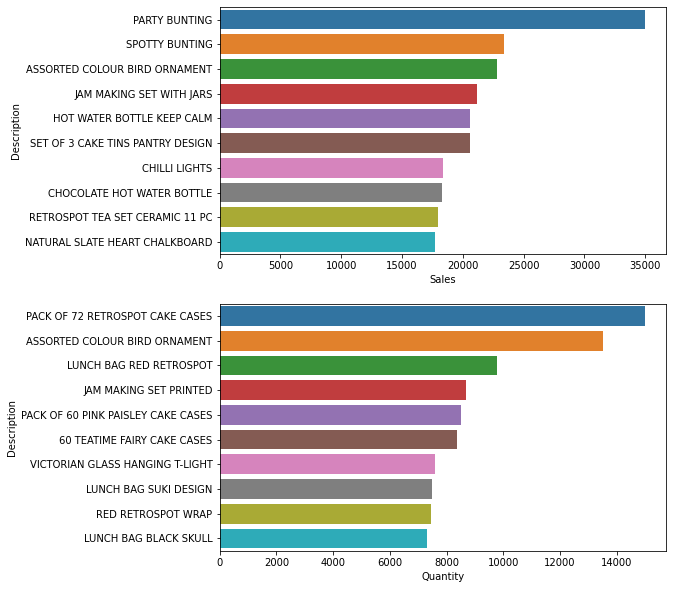

In [31]:
fig, axes = plt.subplots(2,figsize=(8, 10))
sns.barplot(x='Sales', y=Sales_Product.index, data = Sales_Product,
            label="Sales", ax=axes[0])
sns.barplot(x='Quantity', y=Quantity_Product.index, data=Quantity_Product,
            label="Quantity", ax=axes[1])
plt.show()

This is very interesting. There is some difference in Top 10 Sales and Top 10 Quantity of products transactions. It means the higher quantity of sales does not guarantee te higher sales earned. We can draw what is the Top 10 quantity that also generated the highest income sales.

In [32]:
Quantity_Sales = Quantity_Product.merge(Sales_Product, left_index=True, right_index=True, how='inner')
Quantity_Sales

,Total_Order_x,Quantity,Total_Order_y,Sales
Description,,,,
ASSORTED COLOUR BIRD ORNAMENT,1144,13520,1144,22848.8


wow, There is only one product that have the highest quantity and sales that is ASSORTED COLOUR BIRD ORNAMENT.

# **Highest and Lowest Month of Sales**
We already know, if November is the highest peak of transactions. But let's make it clear by exploring what is the month that generated the highest and the lowest sales and quantity.

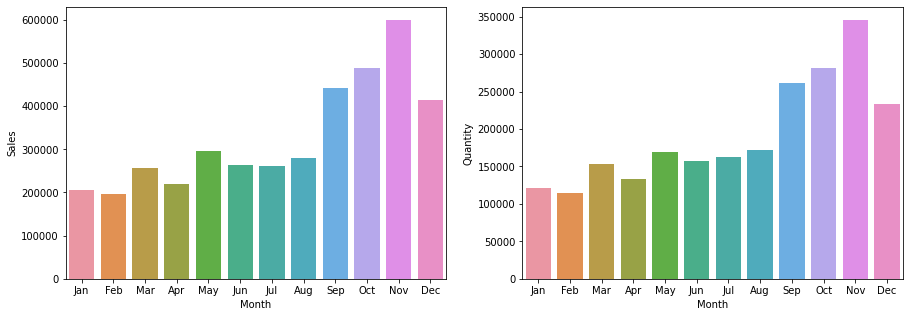

In [33]:
Monthly_Sales = new_df.groupby(['Month']).agg({'Sales':'sum', 'Quantity':'sum'})
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_Sales = Monthly_Sales.reindex(months_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Monthly_Sales.index, y='Sales', data = Monthly_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Monthly_Sales.index, y='Quantity', data = Monthly_Sales,
            label="Quantity", ax=axes[1])
plt.show()

# **Highest Sales of Day**
How about the day? Instead using of sum(), we will explore the highest average of sales and quantitu by day of the weekend. For note, There is no transactions during Saturday.

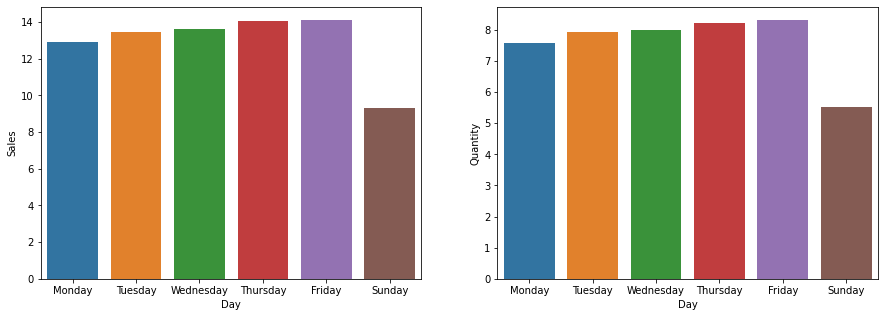

In [34]:
Day_Sales = new_df.groupby(['Day']).agg({'Sales':'mean', 'Quantity':'mean'})
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
Day_Sales = Day_Sales.reindex(day_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Day_Sales.index, y='Sales', data = Day_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Day_Sales.index, y='Quantity', data = Day_Sales,
            label="Quantity", ax=axes[1])
plt.show()

It's quitely close. But we know, Friday is the best day for shopping and Sunday is the 'worst' day for shopping.

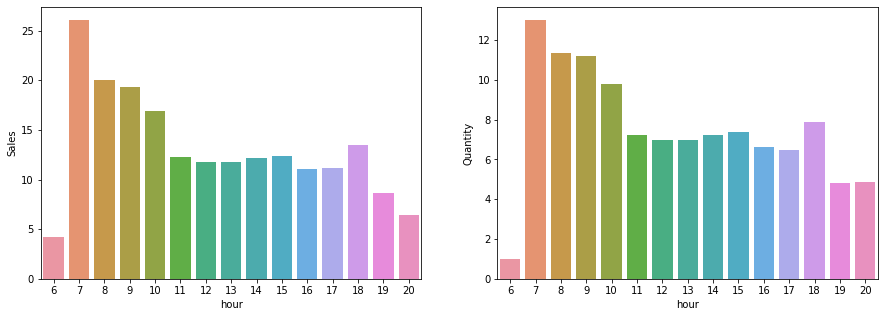

In [35]:
Hour_Sales = new_df.groupby(['hour']).agg({'Sales':'mean', 'Quantity':'mean'})
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Hour_Sales.index, y='Sales', data = Hour_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Hour_Sales.index, y='Quantity', data = Hour_Sales,
            label="Quantity", ax=axes[1])
plt.show()

The answer is morning. Most of transactions happen during morning Especially at 7 a.m, and 8- 10 a.m respectively.

# **Customer**
**Customer Demography**

                CustomerID
Country                   
United Kingdom      272708
Germany               6934
France                6535
EIRE                  4920
Spain                 1849
Belgium               1527
Switzerland           1313
Portugal              1176
Norway                 717
Netherlands            576


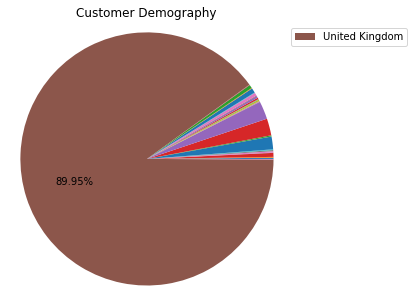

In [36]:
Customer_Demog = new_df.groupby('Country').agg({'CustomerID': ['nunique'],
                                      'CustomerID': 'count'})
print(Customer_Demog.sort_values('CustomerID', ascending=False)[0:10])

f, (ax) = plt.subplots(1, figsize=(5,5))
def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 70 else ''

p,t,a = ax.pie(Customer_Demog.CustomerID, autopct=autopct)
ax.axis('equal')

# normalize dataframe (not actually needed here, but for general case)
normsizes = Customer_Demog.CustomerID/Customer_Demog.CustomerID.sum()*100

# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Customer_Demog.index.values,normsizes.values) if i > 70])

ax.set_title('Customer Demography')
ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))
plt.show()

Just like what happen to transactions and quantity, from the previous chart we know. Most of Customer with the percentage 0f 80% more is coming from the United Kingdom (UK) or domestic customer. Now let's explore, where is the best distribution of foreign custoemr for online retail.

In [37]:
Foreign_Demog = Customer_Demog.reset_index().query('Country != "United Kingdom"')
Foreign_Demog.sort_values('CustomerID', ascending=False).head(10)

,Country,CustomerID
14,Germany,6934
13,France,6535
10,EIRE,4920
30,Spain,1849
3,Belgium,1527
32,Switzerland,1313
26,Portugal,1176
24,Norway,717
23,Netherlands,576
18,Italy,570


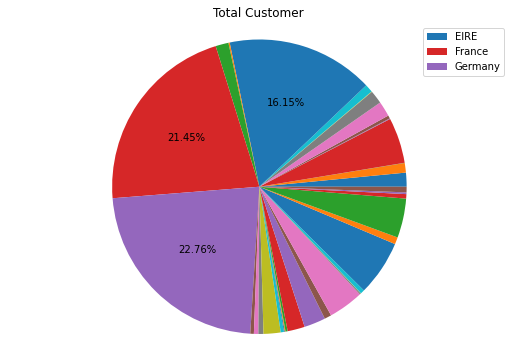

In [38]:
f, ax = plt.subplots(1, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 15 else ''

p,t,a = ax.pie(Foreign_Demog.CustomerID, autopct=autopct)
ax.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Foreign_Demog.CustomerID/Foreign_Demog.CustomerID.sum()*100

# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Demog.Country.values,normsizes.values) if i > 15])
ax.set_title('Total Customer')
ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))

plt.show()

Similar to the transaction and quantity, the Top foreign Customers are mostly coming from Germany, France and Ireland.

# **Top Customer**
Now, it's time to answer, Who are the customers that generated the highest Sales and Quantity?

In [39]:
Sales_Customer = new_df.groupby(['CustomerID']).agg({'Sales':'sum'}).sort_values('Sales', ascending=False)[0:10]
Quantity_Customer = new_df.groupby(['CustomerID']).agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False)[0:10]
print(Sales_Customer)

               Sales
CustomerID          
14911.0     76424.67
13089.0     32957.08
14096.0     32949.41
17841.0     29176.25
14298.0     20823.48
12748.0     18388.33
14156.0     17179.68
13081.0     16012.81
15311.0     14220.87
17675.0     13717.15


In [40]:
print(Quantity_Customer)

            Quantity
CustomerID          
14911.0        45072
13089.0        18858
17841.0        17602
14298.0        14482
12748.0        13372
14096.0        11819
13081.0        11129
14156.0         7422
17735.0         7197
12921.0         7174


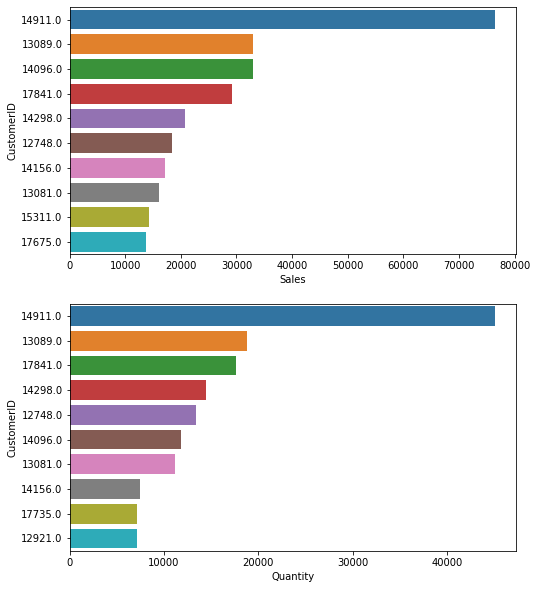

In [41]:
fig, axes = plt.subplots(2,figsize=(8, 10))
sns.barplot(x='Sales', y=Sales_Customer.index, data = Sales_Customer,
            label="Sales", ax=axes[0])
sns.barplot(x='Quantity', y=Quantity_Customer.index, data=Quantity_Customer,
            label="Quantity", ax=axes[1])
plt.show()

Next, Who is the customer that generated BOTH the highest quantity and sales?

In [42]:
Quantity_Sales_Cust = Quantity_Customer.merge(Sales_Customer, left_index=True, right_index=True, how='inner')
Quantity_Sales_Cust

,Quantity,Sales
CustomerID,,
14911.0,45072,76424.67
13089.0,18858,32957.08
17841.0,17602,29176.25
14298.0,14482,20823.48
12748.0,13372,18388.33
14096.0,11819,32949.41
13081.0,11129,16012.81
14156.0,7422,17179.68


Wow, it's very interesting. there are 8 customers that have the highest quantity and generated the highest sales revenue.

# **Order vs Sales**
We know, It's common if in one transaction (order) contains more than one quantity of products. Now let's find who are the top 10 of customers who have the high total order and their sales revenue generated.

In [43]:
Customer_Order = new_df.groupby('CustomerID').agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Total_Order', ascending=False)[0:10]
Customer_Order

,Total_Order,Sales
CustomerID,,
17841.0,6504,29176.25
14911.0,4042,76424.67
14096.0,3968,32949.41
12748.0,3634,18388.33
14606.0,2087,6845.35
15311.0,1631,14220.87
13263.0,1435,5970.94
13089.0,1397,32957.08
15039.0,1086,11738.60


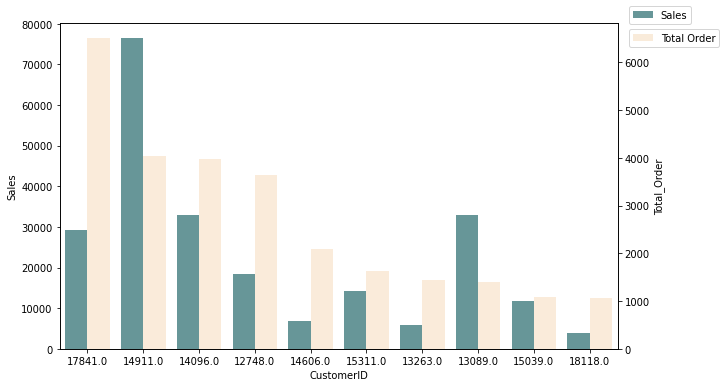

In [44]:
col1 = 'cadetblue'
col2 = 'bisque'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Customer_Order.index, y=Customer_Order.Sales, data=Customer_Order, label='Sales', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)

ax2 = ax.twinx()
sns.barplot(x =Customer_Order.index, y = Customer_Order.Total_Order, data=Customer_Order, alpha=0.7, color = col2, label = 'Total Order', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()

From the previous chart we know, not all of the customers that have the higher transactions also generated the higher sales revenue. Now we will found out, Who are the customers that have BOTH in Top 10 of total order and top 10 of Sales revenue.

In [45]:
Order_Sales_Cust = Customer_Order.merge(Sales_Customer, left_index=True, right_index=True, how='inner')
Order_Sales_Cust

,Total_Order,Sales_x,Sales_y
CustomerID,,,
17841.0,6504,29176.25,29176.25
14911.0,4042,76424.67,76424.67
14096.0,3968,32949.41,32949.41
12748.0,3634,18388.33,18388.33
15311.0,1631,14220.87,14220.87
13089.0,1397,32957.08,32957.08


Wow, it's very interesting. there are 6 customers that have the highest order and also generated the highest sales revenue

**ARPU (Average Revenue Per User)** of Customer
So, huw much we got per transaction? It's time to explore the ARPU for each customer. Average revenue per unit (ARPU) is an indicator of the profitability of a product based on the amount of money that is generated from each of its users or subscribers.

In [46]:
customer_arpu = new_df.groupby('CustomerID').agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'})
customer_arpu['arpu'] = customer_arpu.Sales / customer_arpu.Total_Order
print(customer_arpu.describe())

       Total_Order         Sales         arpu
count  4173.000000   4173.000000  4173.000000
mean     72.650132    939.617012    16.633622
std     180.921991   1997.793054    11.446925
min       1.000000      1.900000     0.735217
25%      13.000000    179.440000     9.553939
50%      33.000000    425.770000    15.995000
75%      80.000000   1050.270000    19.379038
max    6504.000000  76424.670000   166.800000


In [47]:
print(customer_arpu.sort_values('arpu', ascending=False)[0:10])

            Total_Order  Sales        arpu
CustomerID                                
16716.0               1  166.8  166.800000
16319.0               3  404.4  134.800000
14434.0               8  964.8  120.600000
15269.0               1  118.8  118.800000
13147.0               2  237.6  118.800000
13261.0               6  670.5  111.750000
13763.0               2  218.4  109.200000
12882.0               9  924.6  102.733333
15619.0               1   99.6   99.600000
13188.0               1   99.6   99.600000


It's very inetersting. The top 10 ARPU are the consumers that only doing a few transactions or order. Now let's move to know the ARPU from top 10 Customer by their Sales.

# **Arpu TOP Customer**

In [48]:
Top_Arpu = customer_arpu.sort_values('Sales', ascending=False)[0:10]
Top_Arpu

,Total_Order,Sales,arpu
CustomerID,,,
14911.0,4042,76424.67,18.907637
13089.0,1397,32957.08,23.591324
14096.0,3968,32949.41,8.303783
17841.0,6504,29176.25,4.485893
14298.0,852,20823.48,24.440704
12748.0,3634,18388.33,5.060080
14156.0,765,17179.68,22.457098
13081.0,777,16012.81,20.608507
15311.0,1631,14220.87,8.719111


In [49]:
Top_Arpu.describe()

,Total_Order,Sales,arpu
count,10.000000,10.00000,10.000000
mean,2411.200000,27184.97300,16.188253
std,2007.549573,18818.67204,8.505240
min,542.000000,13717.15000,4.485893
25%,795.750000,16304.52750,8.407615
50%,1514.000000,19605.90500,19.758072
75%,3884.500000,32006.12000,23.307768
max,6504.000000,76424.67000,25.308395


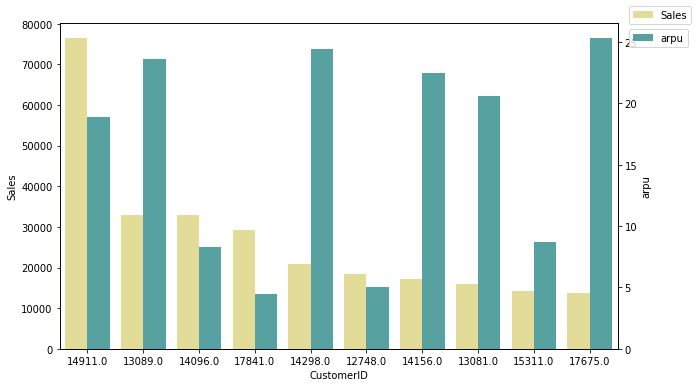

In [50]:
col1 = 'khaki'
col2 = 'darkcyan'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Top_Arpu.index, y=Top_Arpu.Sales, data=Top_Arpu, label='Sales', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)

ax2 = ax.twinx()
sns.barplot(x =Top_Arpu.index, y =Top_Arpu.arpu, data=Top_Arpu, alpha=0.7, color = col2, label = 'arpu', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()


From the previous chart we know, we have some differents ARPU vs their sales generated. It means the higher ARPU does not guarantee the higher sales earned. We also can say, The high ARPU among TOP 10 are preferred to buy the more expensive goods.

# **Customer Segmentation using RFM Analysis**

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Recency: How recently has the customer made a transaction with us
Frequency: How frequent is the customer in ordering/buying some product from us
Monetary: How much does the customer spend on purchasing products from us.

In [51]:
# import libraries
import datetime as dt

df_UK = new_df[new_df['Country'] == "United Kingdom"]
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,hour,month_year,Sales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,12.60


In [52]:
temp=['CustomerID', 'Quantity', 'InvoiceDate', 'Sales']
RFM_data=df_UK[temp]
RFM_data.shape

(272708, 4)

In [53]:
print(df_UK['InvoiceDate'].min())
print(df_UK['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [54]:
NOW = dt.datetime(2011,12,10)
#Convert ORDERDATE to datetime format.
RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])
# RFM Table
RFM_table=RFM_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                                'Quantity': lambda x: len(x.unique()), 
                                                'Sales': lambda x: x.sum()}) 

RFM_table['InvoiceDate'] = RFM_table['InvoiceDate'].astype(int)

RFM_table.rename(columns={'InvoiceDate': 'recency', 
                         'Quantity': 'frequency',
                         'Sales': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
CustomerID,,,
12747.0,2,10,2029.71
12748.0,0,22,18388.33
12749.0,3,10,2600.53
12820.0,3,10,905.92
12821.0,214,3,75.72


In [55]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,17.0,5.0,172.23
0.50,50.0,7.0,409.91
0.75,143.5,10.0,1007.75


In [56]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

# **Who are the best customers?**

In [57]:
#RFMClass = 444
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
13089.0,4,15,32957.08,4,4,4,444
14096.0,4,26,32949.41,4,4,4,444
17841.0,1,25,29176.25,4,4,4,444
14298.0,8,12,20823.48,4,4,4,444
12748.0,0,22,18388.33,4,4,4,444


# **Which customers are at the verge of churning?**

In [58]:
#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
17509.0,57,9,5768.64,2,3,4,234
16745.0,86,15,4249.48,2,4,4,244
14952.0,59,10,3728.06,2,3,4,234
13093.0,275,10,3380.12,1,3,4,134
16652.0,58,8,2879.15,2,3,4,234


# **Who are the lost customers?**

In [59]:
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
18011.0,373,5,63.03,1,1,1,111
13065.0,373,5,120.71,1,1,1,111
14237.0,373,4,77.45,1,1,1,111
17643.0,373,3,58.80,1,1,1,111
15350.0,373,2,115.65,1,1,1,111


# **Who are loyal customers?**

In [60]:
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
13089.0,4,15,32957.08,4,4,4,444
14096.0,4,26,32949.41,4,4,4,444
17841.0,1,25,29176.25,4,4,4,444
14298.0,8,12,20823.48,4,4,4,444
12748.0,0,22,18388.33,4,4,4,444


In [61]:
# Count num of unique segments
RFM_count_unique = RFM_Segment.groupby('RFMClass')['RFMClass'].nunique()
print(RFM_count_unique.sum())
# Calculate RFM_Score
RFM_Segment['RFM_Score'] = RFM_Segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
print(RFM_Segment['RFM_Score'].head())

63
CustomerID
12747.0    11
12748.0    12
12749.0    11
12820.0    10
12821.0     3
Name: RFM_Score, dtype: int64


In [62]:
# Define FMCG_rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_Level
RFM_Segment['RFM_Level'] = RFM_Segment.apply(rfm_level, axis=1)
# Printing the header with top 15 rows 
RFM_Segment.head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12747.0,2,10,2029.71,4,3,4,434,11,Can't Loose Them
12748.0,0,22,18388.33,4,4,4,444,12,Can't Loose Them
12749.0,3,10,2600.53,4,3,4,434,11,Can't Loose Them
12820.0,3,10,905.92,4,3,3,433,10,Can't Loose Them
12821.0,214,3,75.72,1,1,1,111,3,Demands Activation
12822.0,70,8,743.28,2,3,3,233,8,Champions
12824.0,59,4,306.22,2,1,2,212,5,Promising
12826.0,2,9,1367.80,4,3,4,434,11,Can't Loose Them
12827.0,5,5,375.05,4,1,2,412,7,Loyal/Commited


Calculating the average values for each RFM_Level, and return a size of each segment

In [63]:
rfm_level_agg = RFM_Segment.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   recency frequency monetary_value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.7      11.0         1869.0  1420
Champions             66.2       8.1          598.4   358
Demands Activation   257.8       3.0           87.1   373
Loyal/Commited        80.1       6.8          457.7   401
Potential             98.5       5.7          290.2   408
Promising            123.1       4.8          219.1   429
Requires Attention   169.1       4.0          148.1   378
